In [50]:
import pyscreenshot as ImageGrab #what we imported 
import numpy as np 
import time
import pandas as pd
import csv
import cv2
import glob

In [51]:
def one_time():  #we make a function to stop capturing images when we run code (one time execution) 
    images_folder="Digit_Images/9/"

    for i in range(0,100):
       time.sleep(4)# Using time 4 sec to change the digit to capture it again
       im=ImageGrab.grab(bbox=(60,200,800,800)) #x1,y1,x2,y2 (top left corner)
       print("saved......",i)
       im.save(images_folder+str(i)+'.png')
       print("clear screen now then redraw ........")

In [52]:
#Generating dataset :
header  =["label"]
for i in range(0,784): #going through dataset from 0->783
    
    header.append("pixel"+str(i)) # appending each 
with open('dataset.csv', 'a') as f: # creating csv file
    
    writer = csv.writer(f)
    writer.writerow(header) #creating the title of our dataset and adding all of it to row
    
for label in range(10):#reading the images of pixels in numbers ; we havef 10 folders from 0->9.
    
    dirList = glob.glob("Digit_Images/"+str(label)+"/*.png")   #glob is used to extract/return path for 
                                                               # each of my 10 folders
    for img_path in dirList: # opening another for loop to iterate on that path
        im= cv2.imread(img_path) # reading our images
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) # converting our images into greyscale one channel, 
                                                      #(Note: initially it is RGB"red green blue" meaning 3 channels)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0) # We used this syntax(15,15) to blur image for each loop
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)# Then we resize image into 28 by 28 pixel and
                                                                  #then we stored our image into roi(region of interest)
        data=[]#creating one empty list
        data.append(label) #Appending label to my data list (meaning I will append from 0 upto 9 into my data list)
        rows, cols = roi.shape #extracting rows(to rows) and columns(to cols)
       
       ## Add pixel one by one into data array
        for i in range(rows):
            
            for j in range(cols):
                
                k =roi[i,j] # k is the pixel value of particular region
                if k>100: # if k is more than 100 we change it 1
                    
                    k=1
                else: # if k is less than that, we treat that pixel as equal to 0
                    
                    k=0 
                data.append(k) #then we have to append k value in our data list
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f) # right now we have appended pixel value 0 or 1
            writer.writerow(data) 

In [53]:
#load the dataset
import pandas as pd
from sklearn.utils import shuffle # using shuffle we get value randomly
data  =pd.read_csv('dataset.csv') # opening our dataset
data = data.apply(pd.to_numeric , errors='coerce' )#to convert data from string to float
data = data.replace(np.nan, 0, regex=True)
data=shuffle(data) # shuffling my data
data #and then printing data

# as we can see, we collected total of 1000 images(100 images of each digit), and therefore the size of dataset 
# should be 1000 rows and 785 columns ; and This is how we can generate dataset

C:\Users\abdul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
851,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1144,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
print (data.dtypes)

label       float64
pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 785, dtype: object


In [55]:
#separation of dependent(x)(that is 'label' column in one variable) and independent variable(Y)(all 
# other rows of pixel values in the other variable)
X = data.drop(["label"],axis=1)# removes/drops the specified label column/
Y= data["label"]

In [56]:
print (data.dtypes)

label       float64
pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 785, dtype: object


2.0


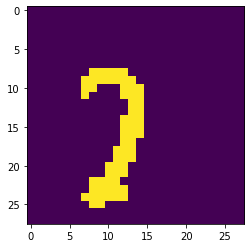

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 525     # idx refers to index in the dataset above
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

2.0


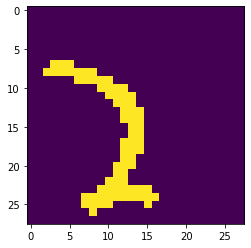

In [58]:
idx1 =230
img1 = X.loc[idx1].values.reshape(28,28)
print(Y[idx1])
plt.imshow(img1)

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.02)
 

In [ ]:
#Fit the model using svc and also to save the model using joblib
import joblib #used to save our model
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y) #are used to create our model
joblib.dump(classifier, "model/digit_recognizer") # then we save our model. This means saving classifier, so I have
# to pass classifier and then we have to give path and name of my model. (Note: model folder has to be in our directory
#before executing.) In this file we have one digit_recognizer file. 
#Next time we don't need to create our model again. We only have to load it then use it.

In [ ]:
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x) #testing data are used to calculate accuracy, without needing to provide label
                                      # so we don't pass text_y
print("Accuracy= ",metrics.accuracy_score(prediction, test_y)) # passing prediction and test_y because our model will
# return the label and we have to check that label to know whether it is correctly predicted or not.
# This was how we could calculate accuracy 
# Accuracy is 100% which very huge accuracy therefore it should predict 100 images out 100 images correctly

In [ ]:
#prediction of image drawn in paint
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
image_folder="img/"
 
while True:

    img=ImageGrab.grab(bbox=(60,200,800,800))
   
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
    rows,cols=roi.shape
   
    X = []
   
   ## Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):    
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
        
           
    predictions  =model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()